## Perform Univariate and Bivariate Analysis
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.

The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [3]:
df = pd.read_csv('train.csv')
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.shape

(550068, 12)

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df1=df.copy()

In [8]:
df1['Product_Category_2'] = df1.groupby(['Product_Category_1', 'Product_ID'], as_index=False)['Product_Category_2'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 0))
df1['Product_Category_3'] = df1.groupby(['Product_Category_1', 'Product_ID'], as_index=False)['Product_Category_3'].transform(lambda x:x.fillna(x.mode().iloc[0] if not x.mode().empty else 0))

In [9]:
df1.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 0.0                 0.0      8370  
1                 6.0                14.0     15200  
2                 0.0                 0.0      1422  
3                14.0                 0.0      1057  
4                 0.0                 0.0      7969

<Axes: xlabel='Age', ylabel='Count'>

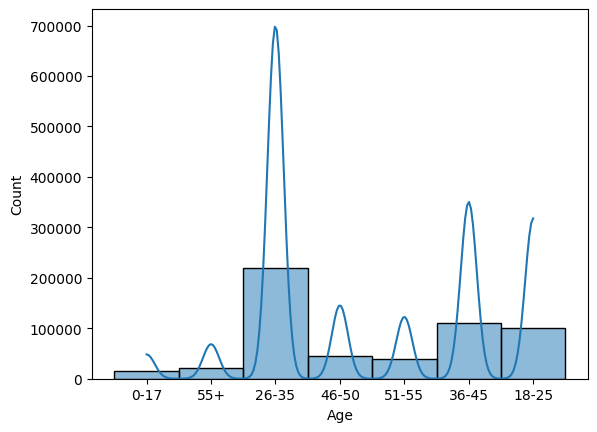

In [10]:
sns.histplot(df1['Age'],  bins=50, kde=True)

In [11]:
df1['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
fig = px.histogram(df1['Occupation'], nbins=20)
fig.update_layout(xaxis= dict(tickmode='linear'), title_text='Histogram of Occupation', xaxis_title= "Occupation")
fig.show()

In [13]:
mar_stts = df1['Marital_Status'].value_counts().reset_index()
fig = px.pie(mar_stts, values='count', names='Marital_Status', title='Distribution of marital status')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [14]:
stay_city = df1['Stay_In_Current_City_Years'].value_counts().reset_index()
fig = px.bar(stay_city, x='Stay_In_Current_City_Years', y='count',  title='Stay in Current City Years')
fig.show()

In [15]:
city_category = df1['City_Category'].value_counts().reset_index()

fig = px.pie(city_category,  values='count', names='City_Category', title='City Category')
fig.show()


In [16]:
gender_count = df1['Gender'].value_counts().reset_index()
fig = px.pie(gender_count,  values='count', names='Gender', title='Gender Distribution')
fig.show()


In [17]:
age_group = df1.groupby('Age', as_index=False)['Purchase'].count()
age_group

Age  Purchase
0   0-17     15102
1  18-25     99660
2  26-35    219587
3  36-45    110013
4  46-50     45701
5  51-55     38501
6    55+     21504

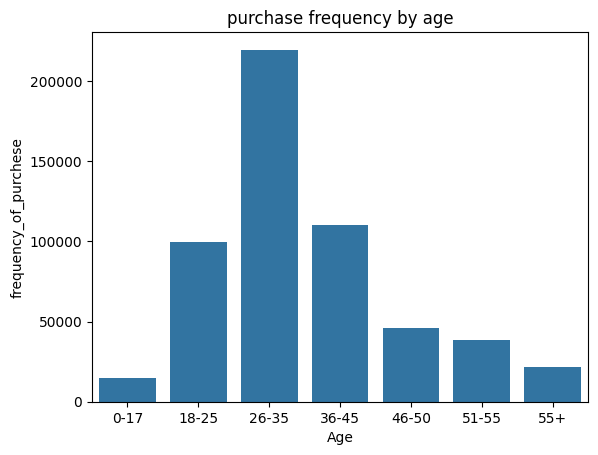

In [18]:
sns.barplot(data=age_group, x='Age', y='Purchase')
plt.title('purchase frequency by age')
plt.xlabel('Age')
plt.ylabel('frequency_of_purchese')
plt.show()

In [19]:
occ_group = df1.groupby('Occupation', as_index=False)['Purchase'].count().sort_values(by='Purchase')
occ_group_pivot = occ_group.pivot_table(index='Occupation', values='Purchase')
occ_group_pivot

Purchase
Occupation          
0            69638.0
1            47426.0
2            26588.0
3            17650.0
4            72308.0
5            12177.0
6            20355.0
7            59133.0
8             1546.0
9             6291.0
10           12930.0
11           11586.0
12           31179.0
13            7728.0
14           27309.0
15           12165.0
16           25371.0
17           40043.0
18            6622.0
19            8461.0
20           33562.0

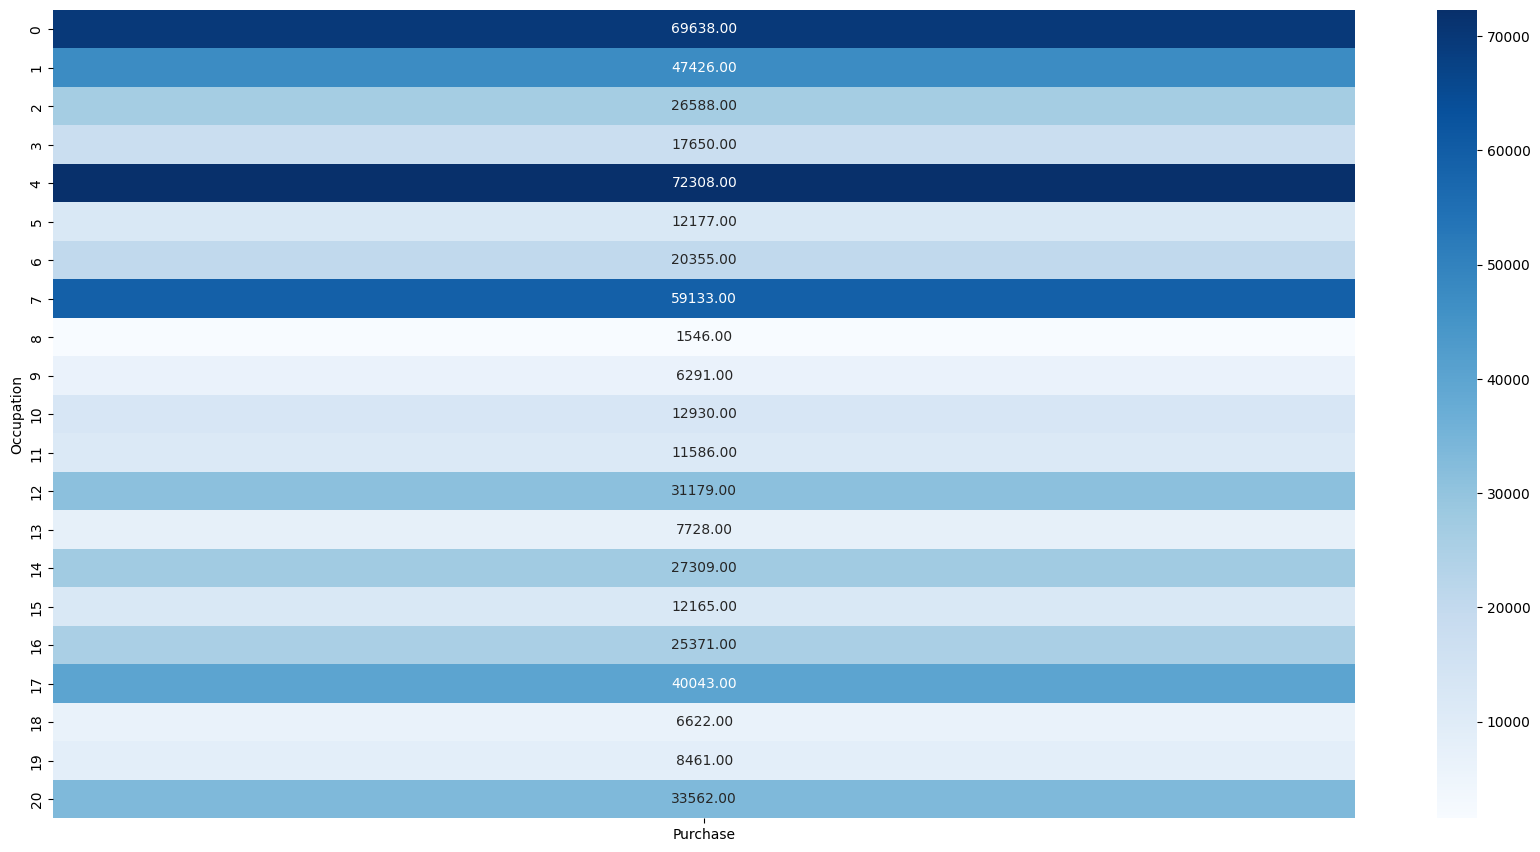

In [20]:
plt.figure(figsize=(21,21/2))
sns.heatmap(occ_group_pivot,  annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.show()

In [21]:
city_purchased = df1.groupby('City_Category',  as_index=False)['Purchase'].count()
fig = px.pie(city_purchased, names='City_Category', values='Purchase')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [22]:
occ_group_city = df1.pivot_table(index='Occupation', columns='City_Category', values='Purchase', aggfunc='count')
occ_group_city

City_Category      A      B      C
Occupation                        
0              18858  29850  20930
1              12809  19756  14861
2               9232  11366   5990
3               5645   6905   5100
4              24205  29854  18249
5               2383   6615   3179
6               3755  10953   5647
7              16216  22986  19931
8                104    829    613
9                708   3224   2359
10              2226   4230   6474
11              2470   5595   3521
12              7080  13184  10915
13               393   2392   4943
14              7745  11256   8308
15              3035   5262   3868
16              6095  10879   8397
17              8177  16111  15755
18              1605   2126   2891
19              2236   3400   2825
20             12743  14400   6419

<Axes: title={'center': 'Occupation by city and purchases'}, xlabel='Occupation'>

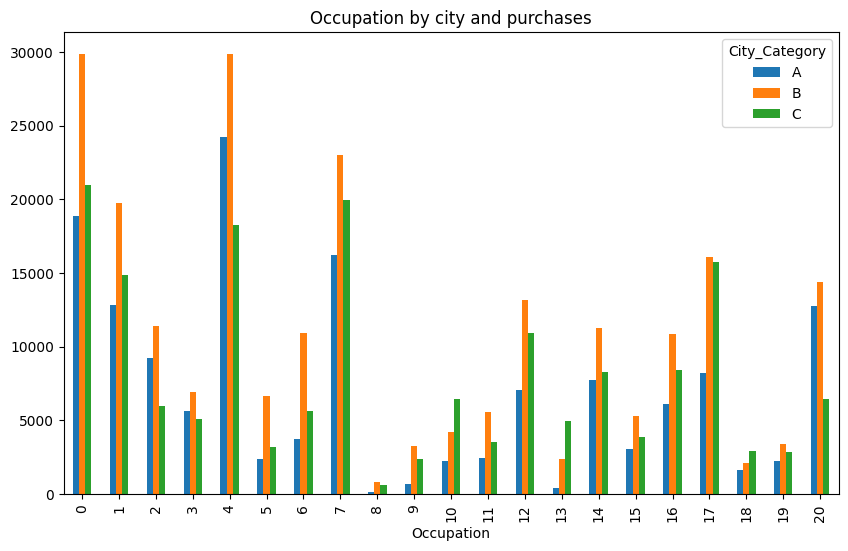

In [23]:
occ_group_city.plot(kind='bar', title='Occupation by city and purchases', figsize=(10,6))

In [24]:
pro_cat1_purch = df1.groupby('Product_Category_1', as_index=False)['Purchase'].count()
pro_cat1_purch

Product_Category_1  Purchase
0                    1    140378
1                    2     23864
2                    3     20213
3                    4     11753
4                    5    150933
5                    6     20466
6                    7      3721
7                    8    113925
8                    9       410
9                   10      5125
10                  11     24287
11                  12      3947
12                  13      5549
13                  14      1523
14                  15      6290
15                  16      9828
16                  17       578
17                  18      3125
18                  19      1603
19                  20      2550

In [25]:
fig = px.bar(pro_cat1_purch, x='Product_Category_1', y='Purchase')
fig.show()

In [26]:
filtered_data = df1[df1['Product_Category_2'] != 0 ]
pro_cat2_purch = filtered_data.groupby('Product_Category_2', as_index=False)['Purchase'].count()
print(pro_cat2_purch)

    Product_Category_2  Purchase
0                  2.0     49217
1                  3.0      2884
2                  4.0     25677
3                  5.0     26235
4                  6.0     16466
5                  7.0       626
6                  8.0     64088
7                  9.0      5693
8                 10.0      3043
9                 11.0     14134
10                12.0      5528
11                13.0     10531
12                14.0     55108
13                15.0     37855
14                16.0     43255
15                17.0     13320
16                18.0      2770


In [27]:
fig = px.bar(pro_cat2_purch, x='Product_Category_2', y='Purchase')
fig.show()

In [29]:
filtered_data = df1[df1['Product_Category_3'] != 0]
pro_cat3_purch = filtered_data.groupby('Product_Category_3', as_index=False)['Purchase'].count()
pro_cat3_purch

Product_Category_3  Purchase
0                  3.0       613
1                  4.0      1875
2                  5.0     16658
3                  6.0      4890
4                  8.0     12562
5                  9.0     11579
6                 10.0      1726
7                 11.0      1805
8                 12.0      9246
9                 13.0      5459
10                14.0     18428
11                15.0     28013
12                16.0     32636
13                17.0     16702
14                18.0      4629

In [30]:
fig = px.bar(pro_cat3_purch, x='Product_Category_3', y='Purchase')
fig.show()

<Axes: xlabel='Age'>

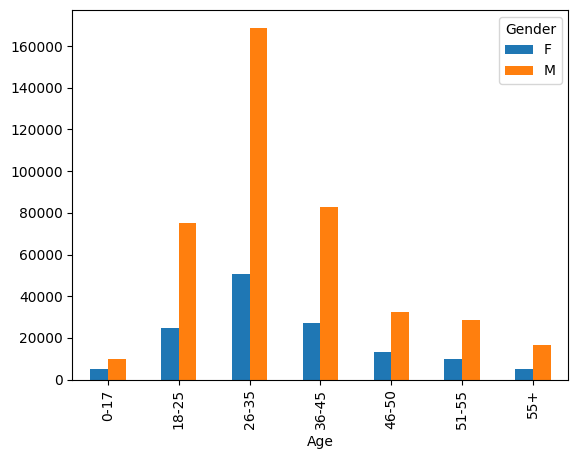

In [34]:
age_group = df1.groupby('Age')['Gender'].value_counts().unstack()
age_group.plot(kind='bar')

<Axes: xlabel='Age'>

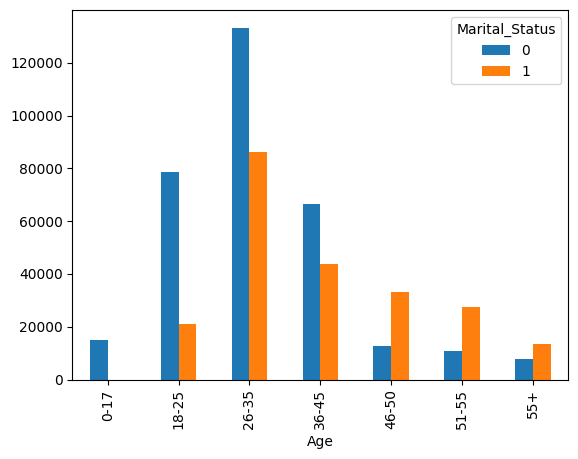

In [35]:
age_group1 = df1.groupby('Age')['Marital_Status'].value_counts().unstack()
age_group1.plot(kind='bar')

<Axes: xlabel='Age,Marital_Status'>

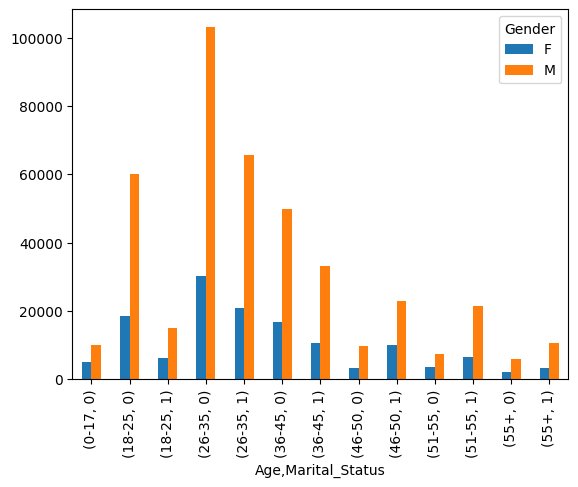

In [36]:
age_group2 = df1.groupby('Age')[['Marital_Status', 'Gender']].value_counts().unstack()
age_group2.plot(kind='bar')